In [1]:
import cv2
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pickle
import json
import math
import warnings
import math
warnings.filterwarnings('ignore')

In [2]:
import csv

In [3]:
root_dir = '/data1/ZL_2018_HR/full/'
df = pd.read_csv('./Final ipynb files/id_and_label_ZL.csv')

In [4]:
with open('./Final ipynb files/ZL_labeled_dirs.pkl', 'rb') as f:
    data_paths = pickle.load(f)

In [5]:
print(len(data_paths))
print(len(df))

39206
39506


In [6]:
desired_nr_samples = 10000

In [7]:
def get_dataset_name(file_name_with_dir):
    filename_without_dir = file_name_with_dir.split('/')[-1]
    return filename_without_dir

In [8]:
def get_labels(data_paths, df):
    labels = []
    dictionary = dict(zip(df['unique_id'], df['label']))
    for path in data_paths:     
        # labels
        img_file = get_dataset_name(path)
        lab = dictionary[img_file]
        labels.append(lab)
    return np.array(labels)

In [9]:
all_labels = get_labels(data_paths, df)
len(all_labels)

39206

In [10]:
def concatenate_data(data_path, df):
    data = []
    labels = []
    dictionary = dict(zip(df['unique_id'], df['label']))
    for path in data_path:     
        # data
        img_matrix = cv2.imread(path)
        img_matrix =  cv2.cvtColor(img_matrix, cv2.COLOR_BGR2RGB)
        crop_img = img_matrix[:-13,:-13]
        data.append(crop_img)
        # labels
        img_file = get_dataset_name(path)
        lab = dictionary[img_file]
        labels.append(lab)
        
        if len(data) % 1000 == 0:
            print('{} of {} samples processed'.format(len(data), len(data_paths)))
    return np.array(data), np.array(labels)

In [11]:
data, labels = concatenate_data(data_paths, df)

1000 of 39206 samples processed
2000 of 39206 samples processed
3000 of 39206 samples processed
4000 of 39206 samples processed
5000 of 39206 samples processed
6000 of 39206 samples processed
7000 of 39206 samples processed
8000 of 39206 samples processed
9000 of 39206 samples processed
10000 of 39206 samples processed
11000 of 39206 samples processed
12000 of 39206 samples processed
13000 of 39206 samples processed
14000 of 39206 samples processed
15000 of 39206 samples processed
16000 of 39206 samples processed
17000 of 39206 samples processed
18000 of 39206 samples processed
19000 of 39206 samples processed
20000 of 39206 samples processed
21000 of 39206 samples processed
22000 of 39206 samples processed
23000 of 39206 samples processed
24000 of 39206 samples processed
25000 of 39206 samples processed
26000 of 39206 samples processed
27000 of 39206 samples processed
28000 of 39206 samples processed
29000 of 39206 samples processed
30000 of 39206 samples processed
31000 of 39206 samp

Now the data and labels are created for 10,000 samples and we can make a csv file (I think).

In [ ]:
# csv_files = []
# for img in os.listdir(root_dir):
#     if img.endswith('csv'):
#         csv_files.append(img)
# csv_name = csv_files[0]

In [ ]:
# df = pd.read_csv(root_dir + csv_name, delimiter=';')

In [ ]:
# df[:2]

In [ ]:
# def get_dataset_name(file_name_with_dir):
#     filename_without_dir = file_name_with_dir.split('/')[-1]
#     return filename_without_dir

# def id_label_link(data_path):
    
#     # select csv file
#     csv_files = []
#     for img in os.listdir(data_path):
#         if img.endswith('csv'):
#             csv_files.append(img)
#     csv_name = csv_files[0]
    
#     # create df and extract nr of pos and neg
#     df = pd.read_csv(data_path + csv_name, delimiter=';')
#     positives = np.array(df['positives'])
#     negatives = np.array(df['negatives'])
    
#     # return label per sample
#     label = np.zeros(len(positives))
#     for i in range(len(label)):
#         if int(positives[i]) > int(negatives[i]):
#             label[i] = int(1)
#         else:
#             label[i] = int(0)

#     # extract the img_id from the df
#     img_id = np.array(df['uuid'])
#     img_id_tiff = []
#     for unq_id in img_id:
#         unq_id_tiff = unq_id + '_rgb_hr_2018.tiff'
#         img_id_tiff.append(unq_id_tiff)
#     img_id_tiff = np.array(img_id_tiff)

#     # link the final label to the id
#     id_label_link = []
#     for i in range(len(label)):
#         id_label_link.append((img_id_tiff[i], label[i]))
#     dict_id_label = dict(id_label_link)

#     return dict_id_label

In [ ]:
# id_label_file = open('id_and_label_ZL.csv', 'w')
# dict_id_label = id_label_link(root_dir)

In [ ]:
# len(dict_id_label)

In [ ]:
# writer = csv.writer(id_label_file)
# for the_id, label in dict_id_label.items():
#     writer.writerow([the_id, label])
    
# id_label_file.close()

### Creat csv file for balanced dataset from original csv

In [12]:
print(len(data))
print(len(labels))
print(len(data_paths))

39206
39206
39206


In [13]:
data_paths[0]

'D:/ZL_2018_HR/ZL_2018_HR/full/1a65a8cd-78d0-4019-bed1-73c609396e09_rgb_hr_2018.tiff'

`count` is the number of positives in this test set

In [14]:
df['unique_id'][0]

'1a65a8cd-78d0-4019-bed1-73c609396e09_rgb_hr_2018.tiff'

In [15]:
count = 0
for i in labels:
    if i == 1:
        count += 1
count

2786

In [16]:
nr_positives = int(count)
nr_negatives =int(len(data)-count)

In [17]:
print(nr_positives)
print(nr_negatives)

2786
36420


`names` are all the unique ids which we want to add to the csv file

In [18]:
names = []
for path in data_paths:
    unq_id = path.split('/')[-1]
    names.append(unq_id)

In [19]:
len(names)

39206

In [20]:
len(labels)

39206

In [21]:
positives = []
for index, label in enumerate(labels):
    if label == np.float(1.0):
        positives.append(index)

In [22]:
pos_ids = []
for index in positives:
    img_name = names[index]
    pos_ids.append(img_name)

In [23]:
# list of indices of the positives

print(len(positives))
print(len(pos_ids))

2786
2786


- `positives` zijn de indices van alle positieven
- `pos_ids` zijn de unique_ids van alle positieven, heb ik niet nodig als ik niet alle positieven gebruik

In [24]:
negatives = []
for index, label in enumerate(labels):
    if label == np.float(0.0):
        negatives.append(index)

In [25]:
# random_negatives = random.sample(negatives, nr_negatives)

In [26]:
len(negatives)

36420

In [27]:
neg_ids = []
for index in negatives:
    img_name = names[index]
    neg_ids.append(img_name)

In [28]:
neg_labs = []
for i in range(len(neg_ids)):
    neg_labs.append(np.float(0.0))

In [29]:
# pos_ids = []
# for index in random_positives:
#     img_name = names[index]
#     pos_ids.append(img_name)

In [30]:
pos_labs = []
for i in range(len(pos_ids)):
    pos_labs.append(np.float(1.0))

In [31]:
id_label_link_neg = []
for i in range(len(neg_labs)):
    id_label_link_neg.append((neg_ids[i], neg_labs[i]))

In [32]:
id_label_link_pos = []
for i in range(len(pos_labs)):
    id_label_link_pos.append((pos_ids[i], pos_labs[i]))

In [33]:
import random

In [35]:
id_label_link = id_label_link_pos + id_label_link_neg
id_label_link_shuffle = random.sample(id_label_link, len(id_label_link))
dict_id_label_link = dict(id_label_link_shuffle)

In [36]:
len(dict_id_label_link)

39206

In [37]:
import csv

In [38]:
id_label_file = open('id_and_label_ZL_complete.csv', 'w')
writer = csv.writer(id_label_file)
for the_id, label in dict_id_label_link.items():
    writer.writerow([the_id, label])
    
id_label_file.close()

In [39]:
test_df = pd.read_csv('id_and_label_ZL_complete.csv', header=None)

In [40]:
test_df

0    1
0      0b2e5667-4a81-4761-89e5-a2c64fa8ef0e_rgb_hr_20...  0.0
1      0e1849aa-b26a-4e73-bb93-aaf8bd3bb264_rgb_hr_20...  0.0
2      84483520-3e84-4e20-9aa4-97bd37dbb777_rgb_hr_20...  0.0
3      54ad1033-0f6c-41ab-918b-bfc1750c1a3d_rgb_hr_20...  0.0
4      017a1766-b76f-40f9-aabb-a80120005dc4_rgb_hr_20...  0.0
...                                                  ...  ...
39201  4884a77a-61d7-4609-a1bf-7bede5054666_rgb_hr_20...  0.0
39202  3cdb0aac-525a-4a88-9f13-397587f7d232_rgb_hr_20...  0.0
39203  ac5e9122-c0b4-4a6b-b5c4-3f1ce71b988c_rgb_hr_20...  0.0
39204  1c372970-c65d-4d70-b58d-38a1143b27ea_rgb_hr_20...  0.0
39205  ca62f8fb-ab97-4717-9dd9-5e92ff9fe19f_rgb_hr_20...  0.0

[39206 rows x 2 columns]

In [42]:
import cv2
import matplotlib.pyplot as plt

In [43]:
import torch

In [52]:
positives[:10]

[30, 95, 118, 148, 221, 244, 259, 266, 300, 329]

In [57]:
len(positives)

2786

In [59]:
len(data)

39206

In [58]:
positives[-1]

39205

In [61]:
test_df.iloc[0,0]

'083d9938-9552-4fa4-9431-da963627c91b_rgb_hr_2018.tiff'

In [62]:
test_df[:5]

0    1
0  083d9938-9552-4fa4-9431-da963627c91b_rgb_hr_20...  1.0
1  71dcd5c2-f964-48c7-b67f-c6d480e26595_rgb_hr_20...  1.0
2  623c84b2-de8f-4ac9-b63e-91b02368cda4_rgb_hr_20...  1.0
3  d3d8cd21-a640-4e20-82c9-d7fbc7ff14f1_rgb_hr_20...  1.0
4  2dede17c-6fdb-4d0a-af63-993de964d7c3_rgb_hr_20...  1.0

tensor(0)


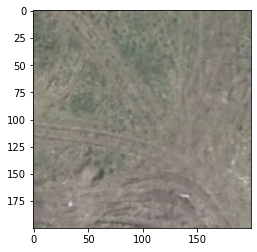

In [71]:
index = 3008
random_img = cv2.imread(root_dir + test_df.iloc[index,0])
random_img =  cv2.cvtColor(random_img, cv2.COLOR_BGR2RGB)
y_label = torch.tensor(int(test_df.iloc[index, 1]))
plt.imshow(random_img)
print(y_label)